# Parameterization of the pressure smoothing 

We can approximate the effect of pressure smoothing as a Gaussian with rms $\lambda_F$, or wavenumber $k_F$.

In Pedersen et al. (2021, 2022) we used a fiducial model (from the "central sim") multiplied by a low-order polynomial around $z_\star = 3$:
$$ \ln k_F(z) = \ln k_{F,\rm{fid}}(z)  + a_{k_F} + b_{k_F} \ln \frac{1+z}{1+z_\star} $$

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from cup1d.nuisance import pressure_model

In [2]:
# construct fiducial model
kF_model_fid=pressure_model.PressureModel()
kF_model_test=pressure_model.PressureModel(ln_kF_coeff=[1,0,-0.1])

### Plot models in velocity units

Text(0.5, 1.0, 'Filtering length')

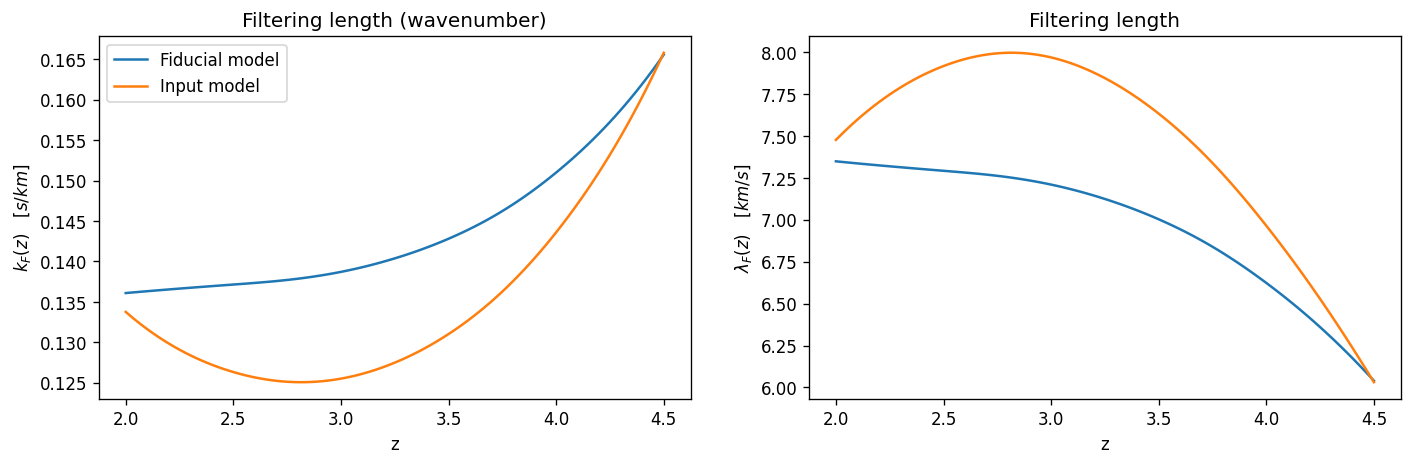

In [3]:
# plot k_F and lambda_F 
plt.figure(figsize=[14,4])
z=np.linspace(2.0,4.5,100)
# start with k_F
plt.subplot(1, 2, 1)
plt.plot(z,kF_model_fid.get_kF_kms(z),label='Fiducial model')
plt.plot(z,kF_model_test.get_kF_kms(z),label='Input model')
plt.xlabel('z')
plt.ylabel(r'$k_F(z) \quad [s/km]$')
plt.title('Filtering length (wavenumber)')
plt.legend()
# now filtering length
plt.subplot(1, 2, 2)
plt.plot(z,1/kF_model_fid.get_kF_kms(z))
plt.plot(z,1/kF_model_test.get_kF_kms(z))
plt.xlabel('z')
plt.ylabel(r'$\lambda_F(z) \quad [km/s]$')
plt.title('Filtering length')

Text(0, 0.5, '$k_F(z) / k_{F \\rm{fid}}$')

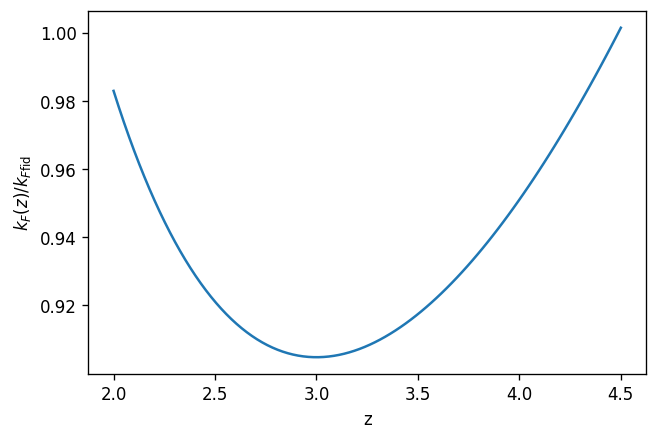

In [4]:
plt.plot(z,kF_model_test.get_kF_kms(z)/kF_model_fid.get_kF_kms(z))
plt.xlabel('z')
plt.ylabel(r'$k_F(z) / k_{F \rm{fid}}$')